#Amazon Data Analysis Project Using Python

<!-- Amazon Sales Analysis Project -->

In [3]:
#import libraries and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# File path
file_path = "C:\\Users\\lenovo\\Desktop\\Amazon DA\\AmazonDashboard.xlsx"
sheet_name = "Orders"
sales_df = pd.read_excel(file_path,sheet_name=sheet_name)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
# checking null or not 
sales_df.isnull().sum().sum()

np.int64(41296)

In [24]:
# replace all null values win Postal Code with 0
sales_df["Postal Code"] = sales_df["Postal Code"].fillna(0)

In [22]:
sales_df["Postal Code"]

0        73120.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    37421.0
51287    94109.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64

In [25]:
sales_df["Postal Code"] 

0        73120.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
51285        0.0
51286    37421.0
51287    94109.0
51288        0.0
51289        0.0
Name: Postal Code, Length: 51290, dtype: float64

In [26]:
sales_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Postal Code       0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

# check for duplicate value in dataset


In [29]:
sales_df.duplicated().sum()

np.int64(0)

In [47]:
sales_df['Product ID'].duplicated().sum()

np.int64(47502)

In [30]:
# total columns in dataet
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

# size of dataset

In [36]:
print("Total no of rows are: ",sales_df.shape[0])
print("Total no of columns are: ",sales_df.shape[1])

Total no of rows are:  51290
Total no of columns are:  24


# Descriptive analysis using describe() function

In [39]:
sales_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,10753.999844,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,0.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,0.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,0.000000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,0.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,26042.011167,487.565361,2.278766,0.212280,174.340972,57.251373


# Basic Data Analysis

In [40]:
# total sales
sales_df["Sales"].sum()

np.float64(12642501.90988)

In [42]:
# average sales
sales_df["Sales"].mean()

np.float64(246.4905812025736)

In [43]:
# total profit
sales_df["Profit"].sum()

np.float64(1467457.2912799998)

In [44]:
# total quantity sole
sales_df["Quantity"].sum()

np.int64(178312)

In [46]:
#total produts
sales_df["Product Name"].count()

np.int64(51290)

In [51]:
# create one column to handle the loss valuee in the table
def solve(value):
    if value > 0:
        return 0
    else:
        return abs(value)
        
sales_df['Loss'] = sales_df['Profit'].apply(solve)

In [55]:
# convert data type to integer
sales_df['Loss'] = sales_df['Loss'] .astype('int')
sales_df['Loss'] 

0          0
1        288
2          0
3         96
4          0
        ... 
51285      0
51286      0
51287      0
51288      0
51289      0
Name: Loss, Length: 51290, dtype: int64

In [56]:
# total loss
sales_df['Loss'].sum()

np.int64(914436)

In [59]:
# total customer
sales_df['Customer ID'].count()

np.int64(51290)

In [66]:
# All regions
sales_df['Region'].unique()

array(['Central US', 'Oceania', 'Western Europe', 'Western Africa',
       'Western US', 'Southern Asia', 'Western Asia', 'South America',
       'Eastern Asia', 'Southern Europe', 'Eastern Africa',
       'Eastern Europe', 'Northern Europe', 'Central America',
       'Eastern US', 'Caribbean', 'Central Africa', 'Southeastern Asia',
       'Southern US', 'North Africa', 'Southern Africa', 'Canada',
       'Central Asia'], dtype=object)

In [68]:
# total countries
sales_df['Country'].unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Philippines', 'Austria', 'Colombia', 'Netherlands',
       'Malaysia', 'Ecuador', 'Thailand', 'Somalia', 'Guatemala',
       'Belarus', 'Cambodia', 'South Africa', 'Canada', 'Japan', 'Russia',
       'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina', 'Lesotho',
       'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon', 'Hungary',
       'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland', 'Ghana',
       'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland', 'Albania',
       'Chad', 'Montenegro', 'Namibia', 'Portugal', 'Madagascar',
       'Sweden', 'Myanmar 

In [70]:
# total segment
sales_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [71]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Loss
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,0.0,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,288
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,0.0,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,0.0,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,96
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,0.0,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,0


<!-- Advance Data Anslysis -->

# Advance Data Analysis

Text(0.5, 1.0, 'Sales By Segment')

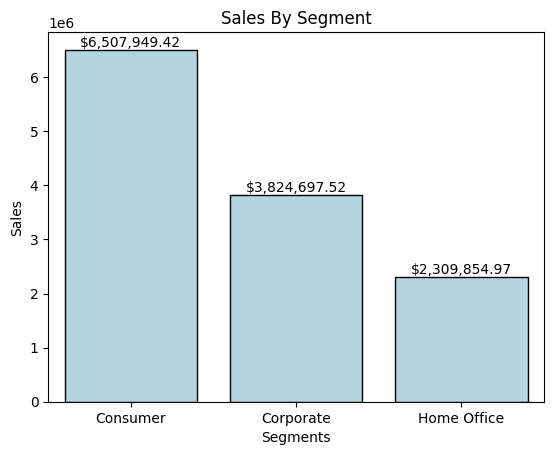

In [169]:
# Let's find sales by Seqment
salebySeg = sales_df.groupby(sales_df['Segment'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

ax = sns.barplot(data=salebySeg,x= 'Segment',y='Sales',color="lightblue",edgecolor="Black")
# Add sales values on top of each bar
for bar, sale in zip(ax.patches, salebySeg['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.xlabel('Segments')
plt.title('Sales By Segment')

In [150]:
# from the above chart it is clear that most of the sales comes from the Consumer and Corporate segment.

#sales by category

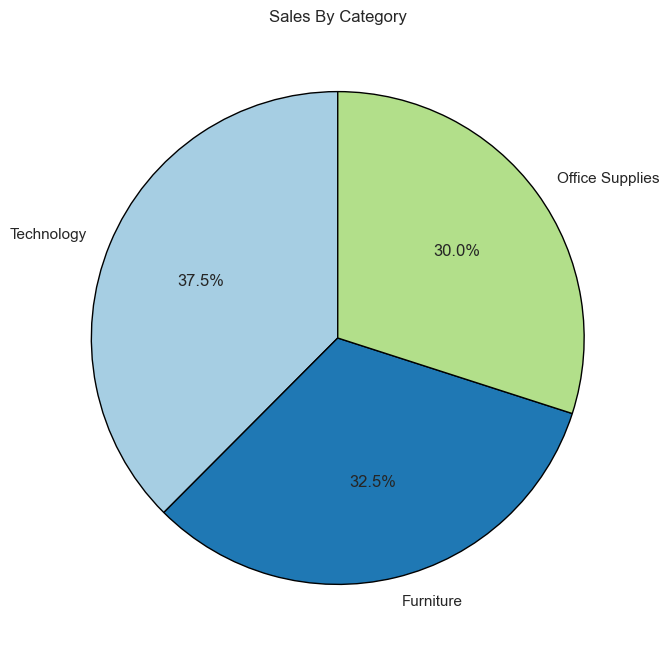

In [210]:
# Sales by category
salesbyCategory = sales_df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    salesbyCategory['Sales'],  # Values for the pie chart
    labels=salesbyCategory['Category'],  # Labels for each segment
    autopct='%1.1f%%',  # Show percentage on each slice
    startangle=90,  # Start angle for the pie chart
    colors=plt.cm.Paired.colors,  # Use a colormap for colors
    wedgeprops={'edgecolor': 'black'}  # Add a border to the slices
)

# Add a title
plt.title('Sales By Category')

# Display the pie chart
plt.show()


In [156]:
# from the sbove chart it is clear that most of the sale comes from the Technology and Furniture category

Text(0.5, 1.0, 'Top 5 Most Sellintg Sub-Category')

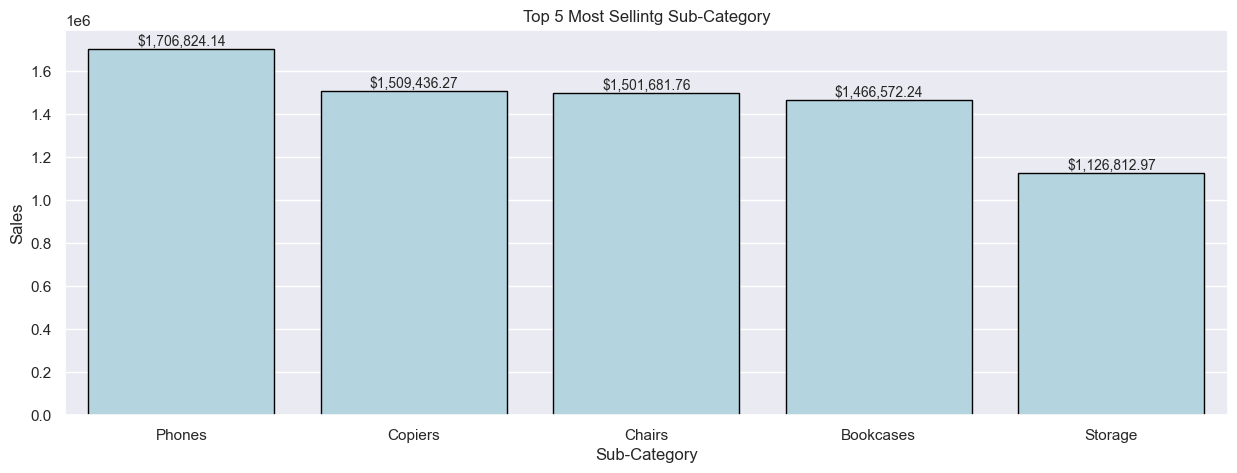

In [195]:
#sales by sub-category
salesbySubCategory = sales_df.groupby(['Sub-Category'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)

ax = sns.barplot(x='Sub-Category',y='Sales',data=salesbySubCategory,color="lightblue",edgecolor="Black")
# Add sales values on top of each bar
for bar, sale in zip(ax.patches, salesbySubCategory['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.title('Top 5 Most Sellintg Sub-Category')

In [173]:
# from the above figure it is clear that top most selling sub category is phones,copiers,chairs,bookcases and storage

               Region         Sales
21     Western Europe  1.731930e+06
3     Central America  1.223101e+06
12            Oceania  1.100185e+06
14  Southeastern Asia  8.844232e+05
16      Southern Asia  8.665727e+05
7        Eastern Asia  8.550594e+05
22         Western US  7.254578e+05
9          Eastern US  6.787812e+05
11    Northern Europe  6.367792e+05
13      South America  6.172237e+05


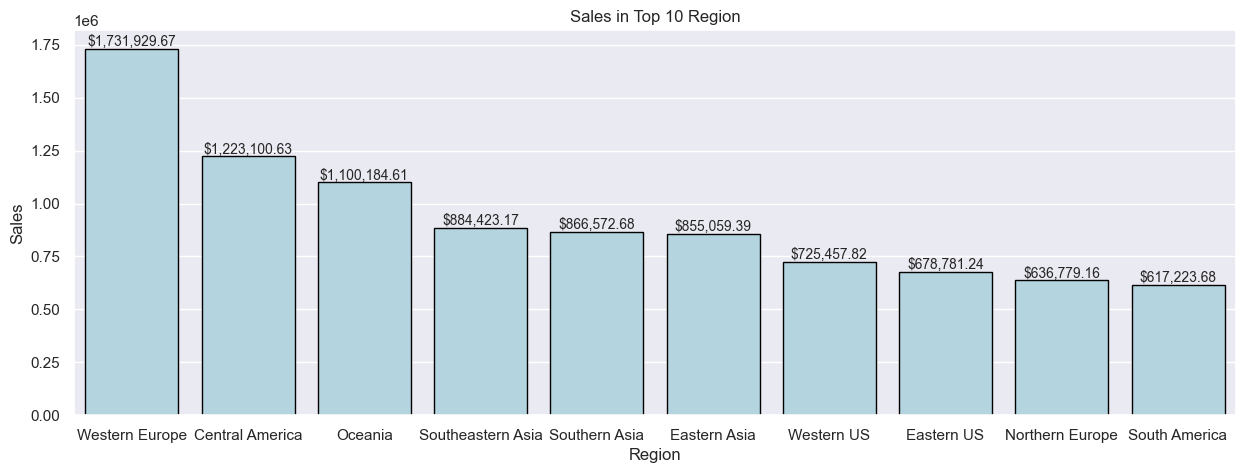

In [193]:
#sales by Region
salesbyRegion = sales_df.groupby(['Region'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

ax = sns.barplot(x='Region',y='Sales',data=salesbyRegion,color="lightblue",edgecolor="Black")
# Add sales values on top of each bar
for bar, sale in zip(ax.patches, salesbyRegion['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )
plt.xlabel('Region')
plt.title('Sales in Top 10 Region')
print(salesbyCategory)

In [183]:
# from the above figure it is clear that top most selling region is is estern europe, central america, oceania,southeastern asia,eastern asia

#sales by Country

Text(0.5, 1.0, 'Top 10 Most Sellintg Country')

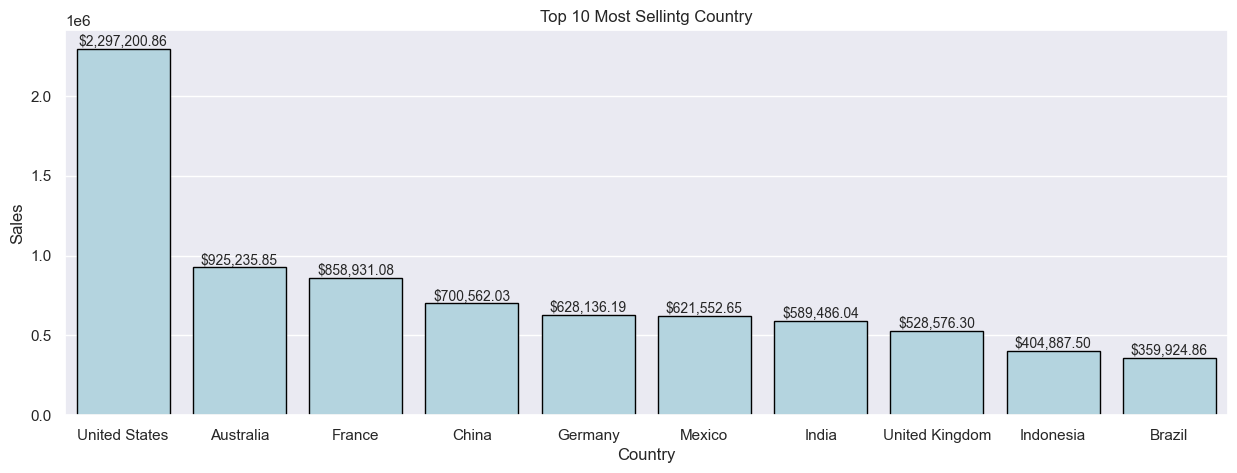

In [189]:
#sales by Country
salesbyCountry = sales_df.groupby(['Country'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

ax = sns.barplot(x='Country',y='Sales',data=salesbyCountry,color="lightblue",edgecolor="Black")
# Add sales values on top of each bar
for bar, sale in zip(ax.patches, salesbyCountry['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.title('Top 10 Most Sellintg Country')

In [197]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Loss'],
      dtype='object')

#Top 5 product With High Loss

                                   Product Name  Loss
1007  Cubify CubeX 3D Printer Double Head Print  9238
1928                        Hoover Stove, White  6938
1493  GBC DocuBind P400 Electric Binding System  6857
310                Apple Smart Phone, Full Size  6557
2414             Motorola Smart Phone, Cordless  6508


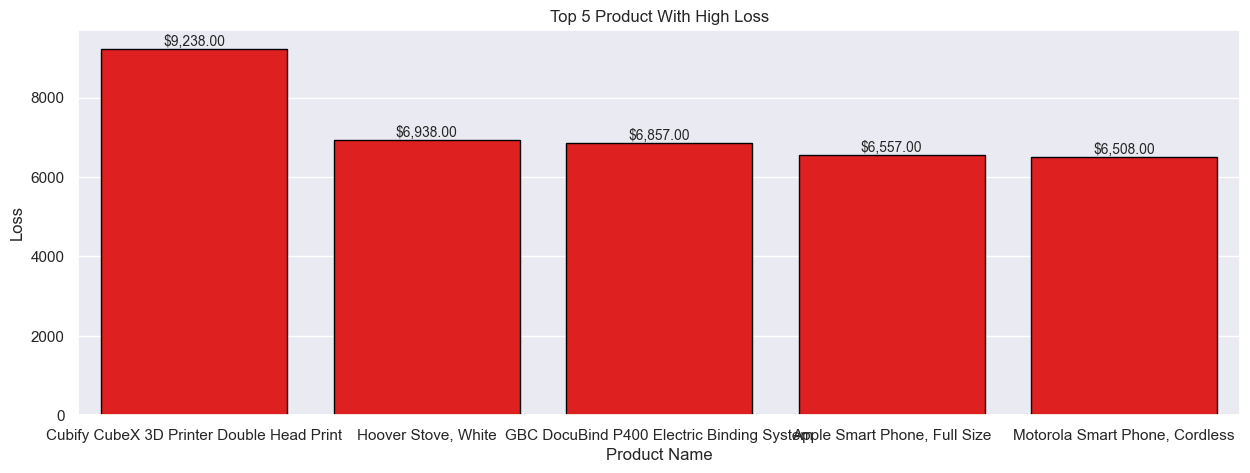

In [202]:
#top 5 product with high loss
lossProduct = sales_df.groupby(['Product Name'],as_index=False)['Loss'].sum().sort_values(by='Loss',ascending=False).head(5)
ax = sns.barplot(x='Product Name',y='Loss',data=lossProduct,color="red",edgecolor="Black")
# Add loss values on top of each bar
for bar, sale in zip(ax.patches, lossProduct['Loss']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.title('Top 5 Product With High Loss')
print(lossProduct)

In [203]:
# from the above chart we can say the top product with high loss is: 
# Cubify CubeX 3D Printer Double Head Print,Hoover Stove, White,GBC DocuBind P400 Electric Binding System,Apple Smart Phone, Full Size,Motorola Smart Phone, Cordless

# Top 5 Customer with their purchase amount

Text(0.5, 1.0, 'Top 5 Customer With High Purchase Value')

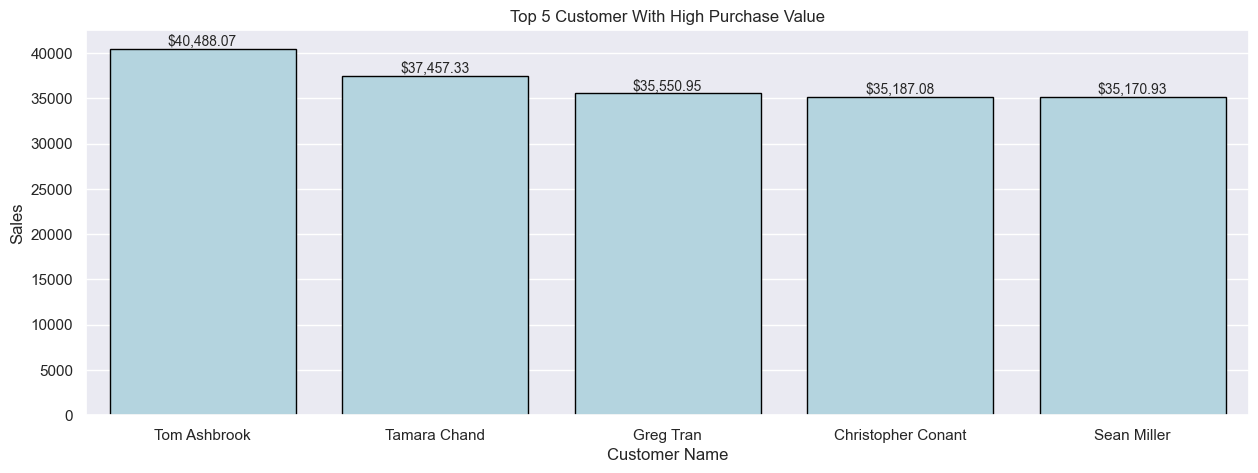

In [207]:
# Top 5 Customer with their purchase amount
#top 5 product with high loss
top5Cust = sales_df.groupby(['Customer Name'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)
ax = sns.barplot(x='Customer Name',y='Sales',data=top5Cust,color="lightblue",edgecolor="Black")
# Add loss values on top of each bar
for bar, sale in zip(ax.patches, top5Cust['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.title('Top 5 Customer With High Purchase Value')

In [206]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Loss'],
      dtype='object')

Text(0.5, 1.0, 'Sales By Market')

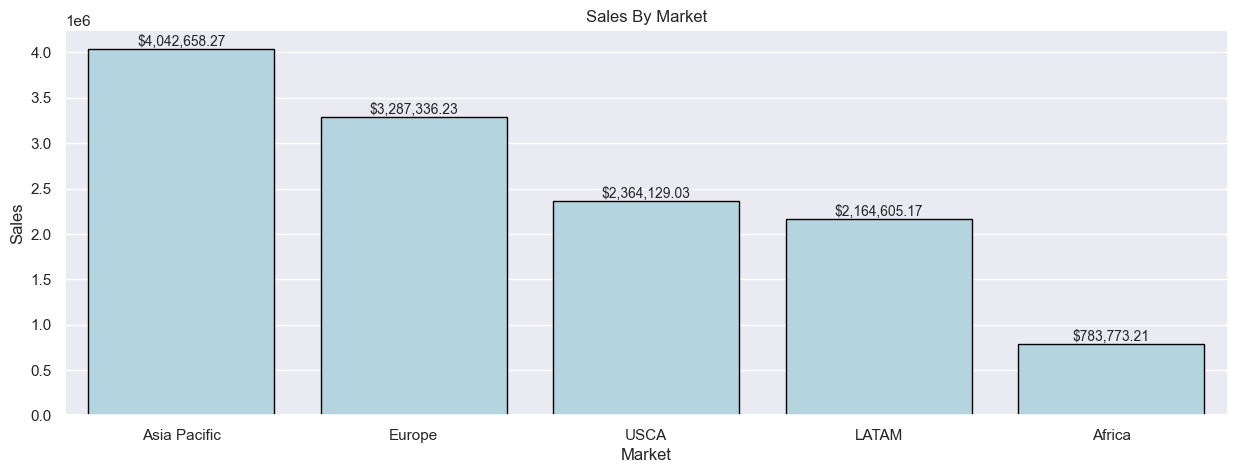

In [227]:
# Sales by Market
salesbyMarket = sales_df.groupby(['Market'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
ax = sns.barplot(x='Market',y='Sales',data=salesbyMarket,color="lightblue",edgecolor="Black")
# Add loss values on top of each bar
for bar, sale in zip(ax.patches, salesbyMarket['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.title('Sales By Market')

In [216]:
# Lets fetch data using date
# now create one column in the table to extract year from date
sales_df['Year'] = sales_df['Order Date'].dt.year

# Sales By year

Text(0.5, 1.0, 'Sales By Year')

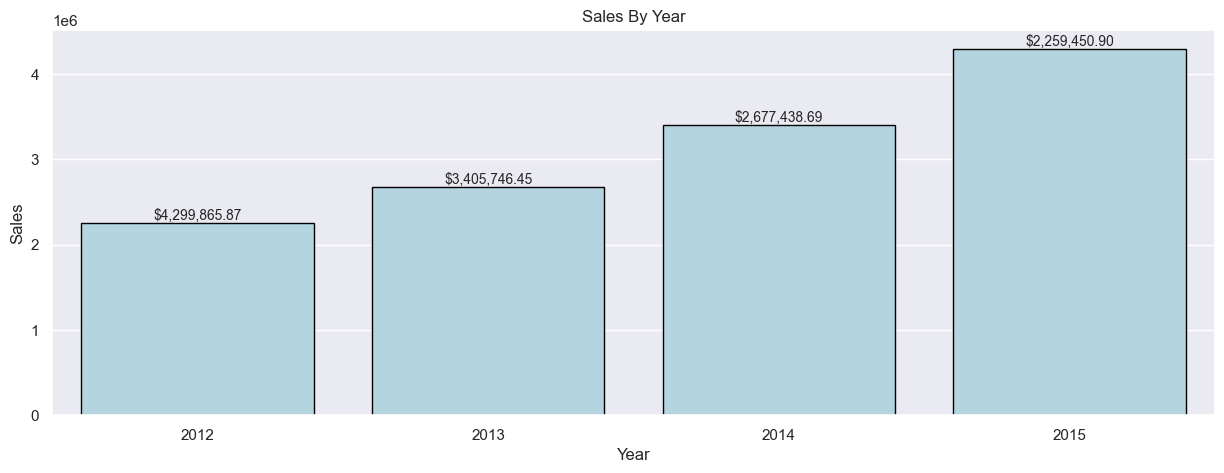

In [218]:
# Sales by Market
salesbyYear = sales_df.groupby(['Year'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
ax = sns.barplot(x='Year',y='Sales',data=salesbyYear,color="lightblue",edgecolor="Black")
# Add loss values on top of each bar
for bar, sale in zip(ax.patches, salesbyYear['Sales']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),  # Y position (height of the bar)
        f'${sale:,.2f}',  # Label with formatted sales value
        ha='center',  # Center align
        va='bottom',  # Position above the bar
        fontsize=10  # Font size
    )

plt.title('Sales By Year')

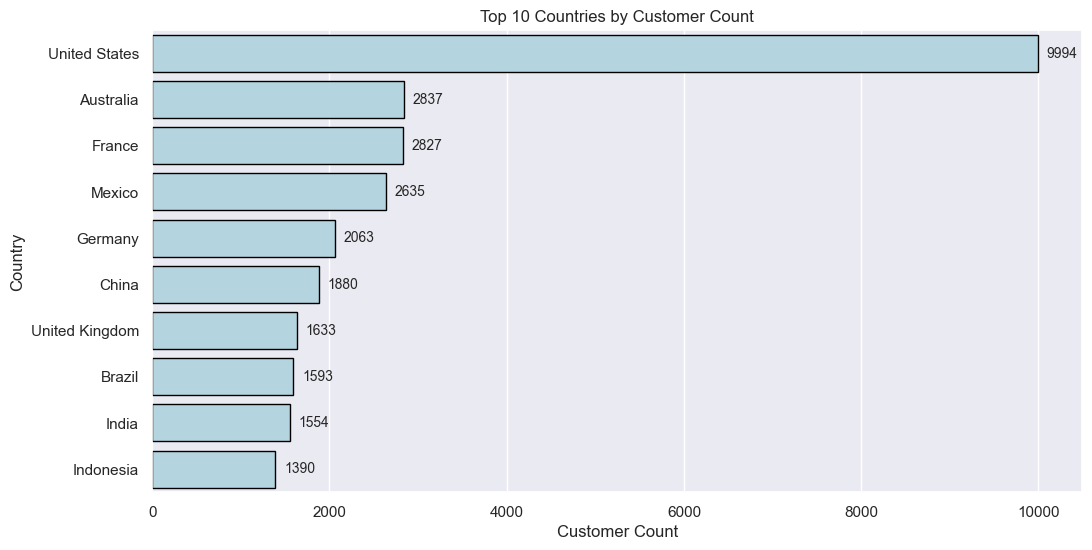

In [234]:
# Count customers by country
CustomerByCountry = (
    sales_df.groupby(['Country'], as_index=False)['Customer ID']
    .count()
    .rename(columns={'Customer ID': 'Customer Count'})
    .sort_values(by='Customer Count', ascending=False)
    .head(10)
)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Customer Count',  # Customer count is now on the x-axis
    y='Country',          # Country is now on the y-axis
    data=CustomerByCountry,
    color="lightblue",
    edgecolor="black"
)

# Add customer count values on top of each bar
for bar, count in zip(ax.patches, CustomerByCountry['Customer Count']):
    ax.text(
        bar.get_width() + 100,  # X position (just past the end of the bar for clarity)
        bar.get_y() + bar.get_height() / 2,  # Y position (middle of the bar)
        f'{count}',                         # Text: Customer Count
        ha='left',                          # Horizontal alignment (left of the bar)
        va='center',                        # Vertical alignment (centered within the bar)
        fontsize=10                         # Font size
    )

# Adding labels and title
plt.xlabel('Customer Count')
plt.ylabel('Country')
plt.title('Top 10 Countries by Customer Count')

# Display the plot
plt.show()
